In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Week3/MachineLearningRating_v3.csv", delimiter='|')
df.head()

<ipython-input-3-bb1334c5f387>:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/drive/MyDrive/Week3/MachineLearningRating_v3.csv", delimiter='|')


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

In [ ]:
df.dtypes

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [ ]:
df.isna().sum()

,0
UnderwrittenCoverID,0
PolicyID,0
TransactionMonth,0
IsVATRegistered,0
Citizenship,0
LegalType,0
Title,0
Language,0
Bank,145961
AccountType,40232


In [4]:
# Descriptive statistics for numerical columns
numerical_columns = ['TotalPremium', 'TotalClaims', 'SumInsured', 'CalculatedPremiumPerTerm']
print(df[numerical_columns].describe())

# Frequency counts for categorical columns
categorical_columns = ['CoverCategory', 'VehicleType', 'LegalType']
for col in categorical_columns:
    print(f"{col} value counts:")
    print(df[col].value_counts())


       TotalPremium   TotalClaims    SumInsured  CalculatedPremiumPerTerm
count  1.000098e+06  1.000098e+06  1.000098e+06              1.000098e+06
mean   6.190550e+01  6.486119e+01  6.041727e+05              1.178757e+02
std    2.302845e+02  2.384075e+03  1.508332e+06              3.997017e+02
min   -7.825768e+02 -1.200241e+04  1.000000e-02              0.000000e+00
25%    0.000000e+00  0.000000e+00  5.000000e+03              3.224800e+00
50%    2.178333e+00  0.000000e+00  7.500000e+03              8.436900e+00
75%    2.192982e+01  0.000000e+00  2.500000e+05              9.000000e+01
max    6.528260e+04  3.930921e+05  1.263620e+07              7.442217e+04
CoverCategory value counts:
CoverCategory
Passenger Liability                                    104158
Third Party                                            102825
Keys and Alarms                                        102428
Signage and Vehicle Wraps                              102416
Emergency Charges                           

In [5]:
def  clean_data(df):
  columns = df.columns
  for column in columns:
    # Replacing missing values with mean (for numeric) or mode (for catagorical)
    if df[column].dtype == "float64" or df[column].dtype == 'init64':
      df[column].fillna(df[column].mean())
      # Identify outliers using the IQR method
      q1 = df[column].quantile(0.25)
      q3 = df[column].quantile(0.75)
      IQR = q3- q1
      lower_bound = q1 -1.5* IQR
      upper_bound = q3 +1.5* IQR
      df[column].clip(lower_bound, upper_bound) # Replace outlier
    else :
      df[column].fillna(df[column].mode()[0]) #Replce missing values with mode
  return df

# cleaned data
df_cleaned = clean_data(df)
df_cleaned = df_cleaned.drop("NumberOfVehiclesInFleet", axis=1)

df_cleaned['TransactionMonth']=pd.to_datetime(df_cleaned['TransactionMonth'])

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 51 columns):
 #   Column                    Non-Null Count    Dtype         
---  ------                    --------------    -----         
 0   UnderwrittenCoverID       1000098 non-null  int64         
 1   PolicyID                  1000098 non-null  int64         
 2   TransactionMonth          1000098 non-null  datetime64[ns]
 3   IsVATRegistered           1000098 non-null  bool          
 4   Citizenship               1000098 non-null  object        
 5   LegalType                 1000098 non-null  object        
 6   Title                     1000098 non-null  object        
 7   Language                  1000098 non-null  object        
 8   Bank                      854137 non-null   object        
 9   AccountType               959866 non-null   object        
 10  MaritalStatus             991839 non-null   object        
 11  Gender                    990562 non-null   object

In [ ]:
def group_data(df, end_col, start_col=''):
  return df.loc[: , start_col : end_col]

df_cleint = group_data(df_cleaned, "Gender", "PolicyID")
df_location = group_data(df_cleaned,"Country", "SubCrestaZone")
df_car_insured = group_data(df_cleaned, 'ItemType','CrossBorder')
df_plan = group_data(df_cleaned,'SumInsured', 'StatutoryRiskType')
df_payment = group_data(df_cleaned,'TotalClaims','TotalPremium')



In [ ]:
df_payment.head()

,TotalPremium,TotalClaims
0,21.929825,0.0
1,21.929825,0.0
2,0.000000,0.0
3,512.848070,0.0
4,0.000000,0.0


In [ ]:
df_cleaned.loc[: , "PolicyID": "Gender"].head()

,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender
0,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
1,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
2,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
3,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
4,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified


In [ ]:
df_cleint.head()

,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,MaritalStatus,Gender
0,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
1,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
2,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
3,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified
4,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,Not specified,Not specified


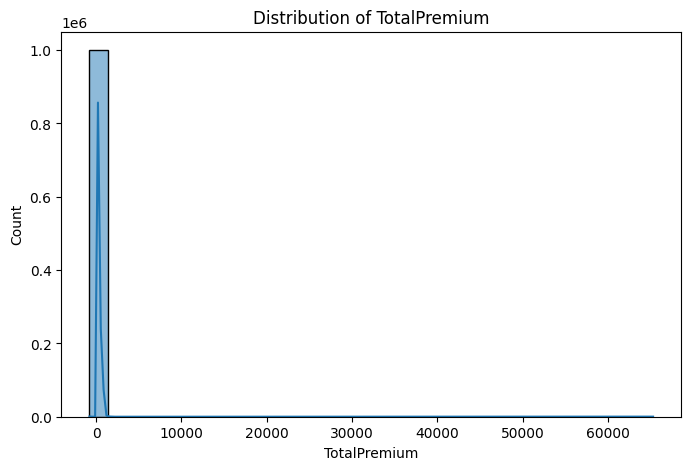

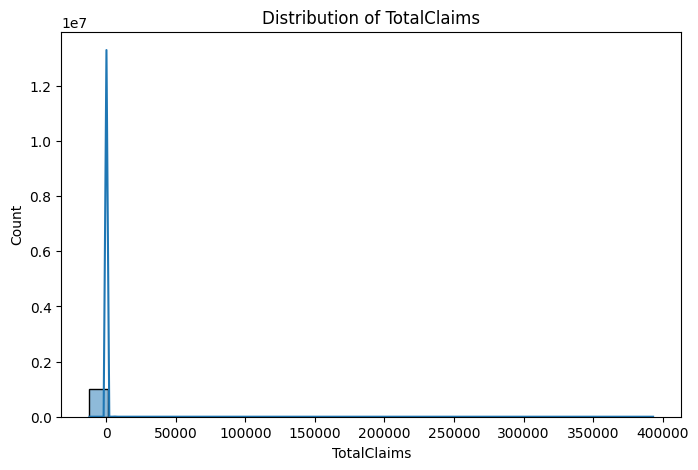

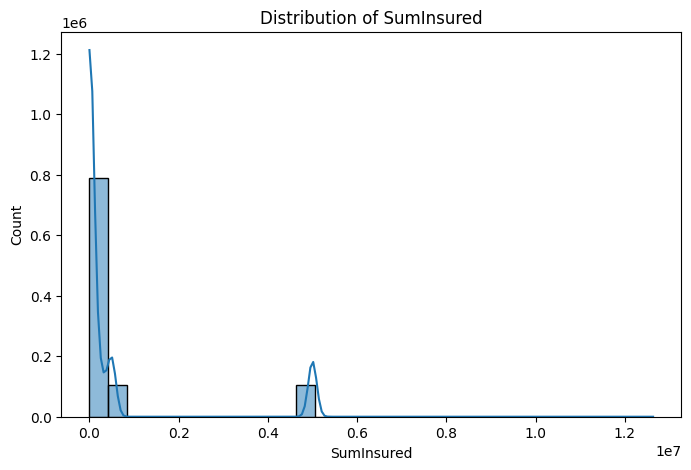

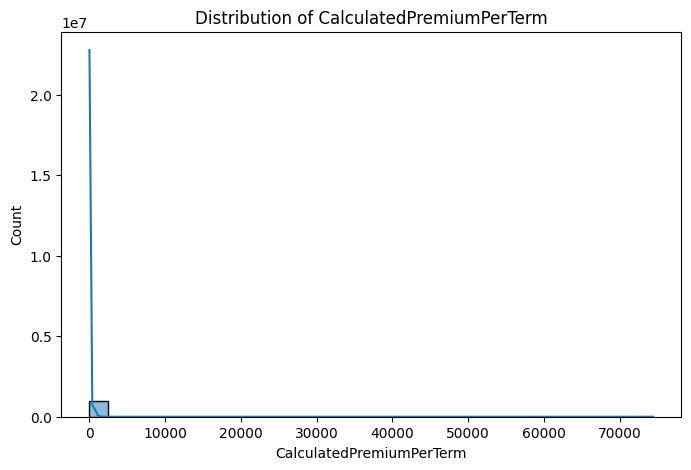

<ipython-input-6-a0cf38dccdab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


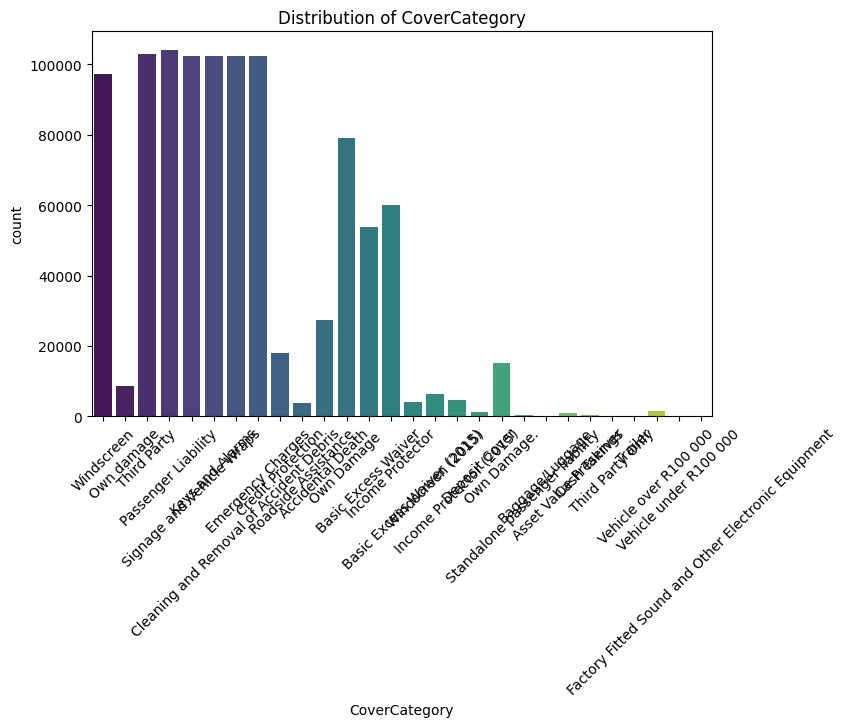

<ipython-input-6-a0cf38dccdab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


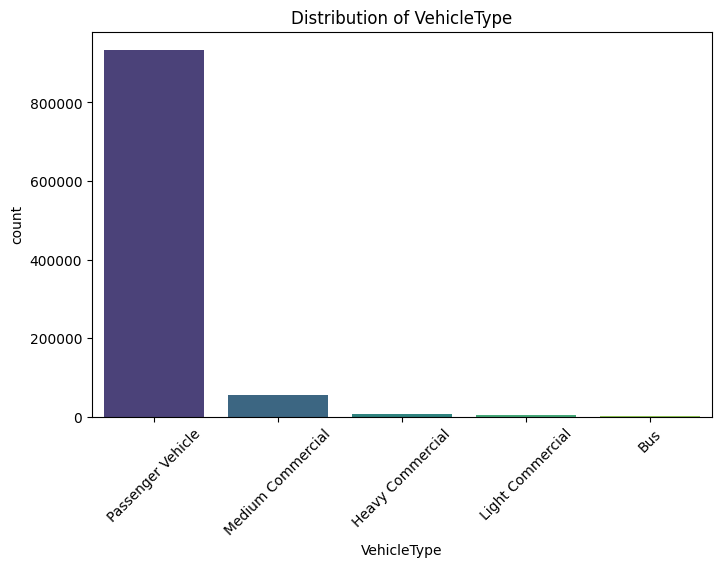

<ipython-input-6-a0cf38dccdab>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=df, palette="viridis")


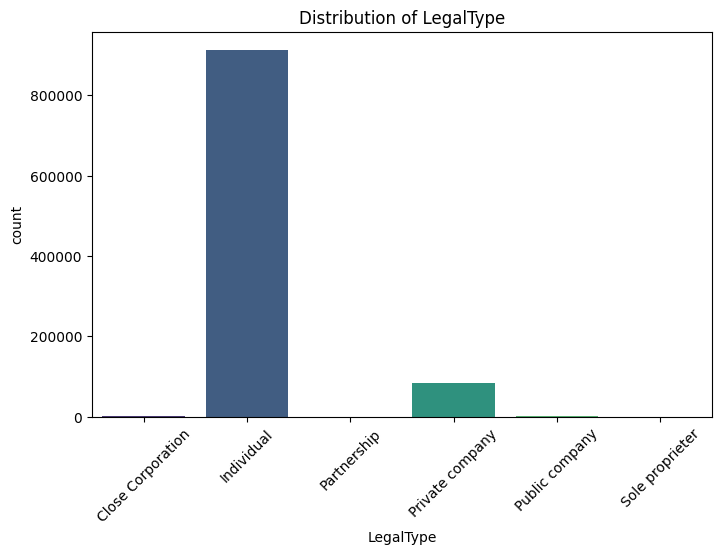

In [6]:
# Histograms for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

# Bar plots for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=col, data=df, palette="viridis")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show()


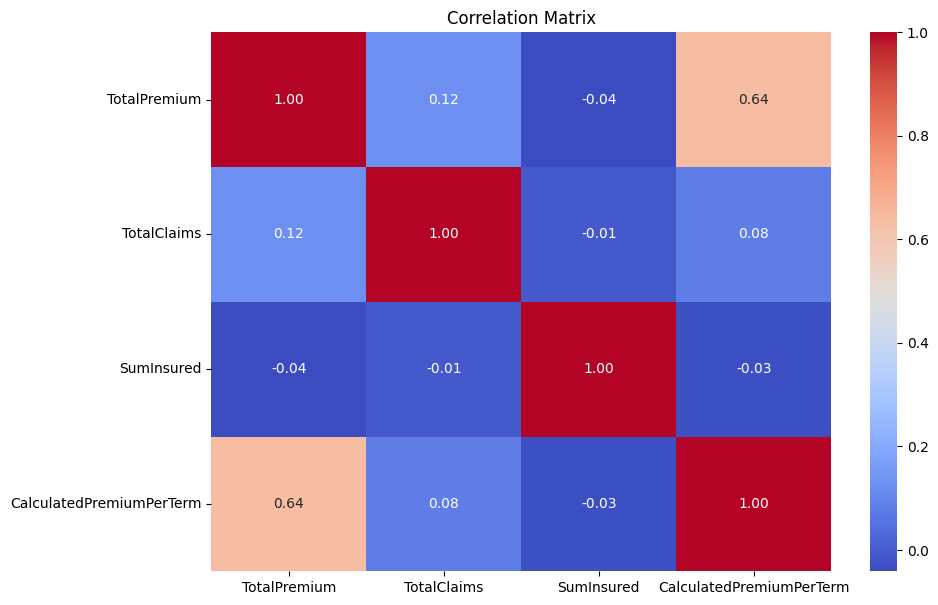

In [7]:
# Compute correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


Plots of distributon graph of client columns

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


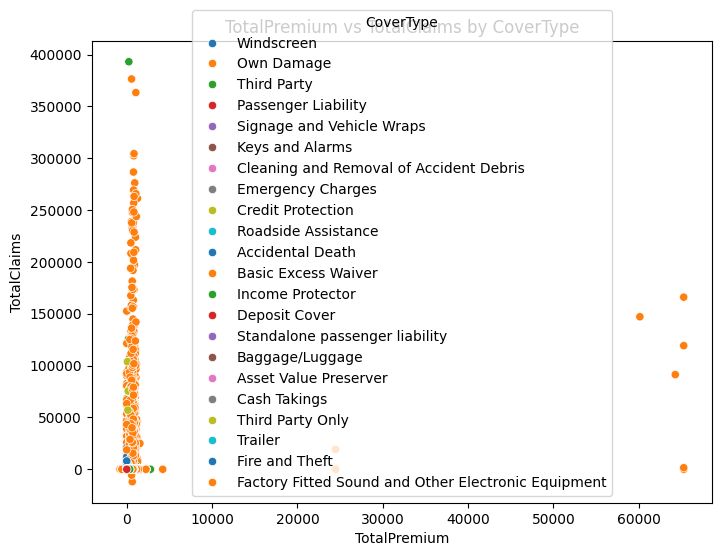

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TotalPremium', y='TotalClaims', hue='CoverType', data=df, palette='tab10')
plt.title("TotalPremium vs TotalClaims by CoverType")
plt.xlabel("TotalPremium")
plt.ylabel("TotalClaims")
plt.legend(title="CoverType")
plt.show()


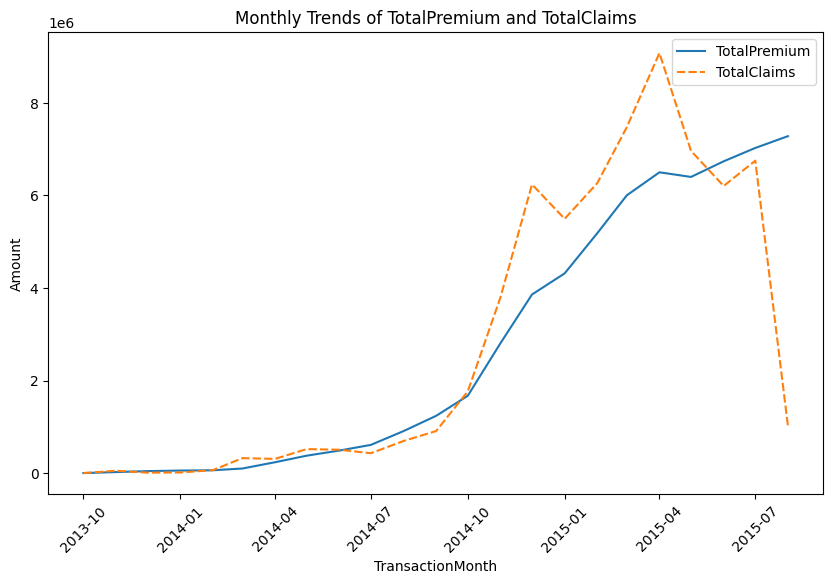

In [10]:
# Convert TransactionMonth to datetime if not already
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

# Aggregate data by TransactionMonth
monthly_data = df.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum()

# Line plot for TotalPremium and TotalClaims
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_data)
plt.title("Monthly Trends of TotalPremium and TotalClaims")
plt.xlabel("TransactionMonth")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()


In [11]:
!pip install geopandas

In [12]:
import geopandas as gpd

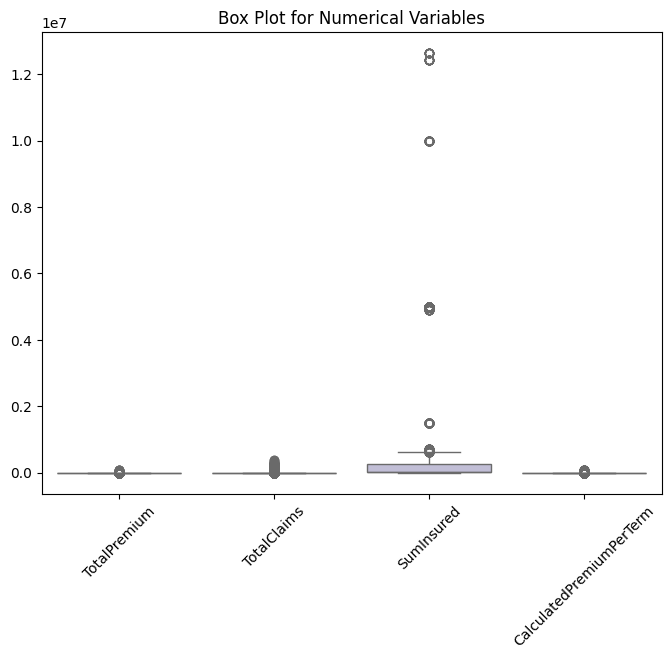

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[numerical_columns], palette='Set3')
plt.title("Box Plot for Numerical Variables")
plt.xticks(rotation=45)
plt.show()
